# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Оценки параметров и сбор данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb и **в формате html**, который можно получить как `File -> Download as -> HTML`.
* Теоретические задачи необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив;
  * фотографией, **встроенной в ноутбук** посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Теоретические задачи не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта. Неправильно вставленные фотографии могут не передаться при отправке.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 5 баллов
* Задача 3 &mdash; 12 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 6 баллов
* Задача 5 &mdash; 10 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

[Ссылка на данные](https://drive.google.com/drive/u/1/folders/17haFu2ID1DQjtWfLOD_i5Em6pQC8VI64)

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

**Доказательство:**

**а)** $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac1n\sum\limits_{i=1}^n(X_i^2- 2\cdot\overline{X}\cdot X_i + \overline{X}^2) =\frac1n\sum\limits_{i=1}^nX_i^2 - \overline{X}\frac2n\sum\limits_{i=1}^nX_i + \frac1n\sum\limits_{i=1}^n\overline{X}^2 = \overline{X^2} -2\cdot\overline{X}^2+\overline{X}^2=\overline{X^2}-\overline{X}^2$

**б)** Здесь я буду использовать то, что матожидание линейно и $X_i$ - независимые одинаково распределенные случайные величины, тогда $\mathsf{E}X_iX_j = \mathsf{E}X_i \cdot \mathsf{E}X_j = (\mathsf{E}X_i)^2=(\mathsf{E}X_1)^2$. 
Необходимо проверить, правда ли $\mathsf{E}S^2 = \sigma^2$:

$\mathsf{E}S^2 = \mathsf{E}\left(\overline{X^2}-\overline{X}^2\right) = \mathsf{E}\overline{X^2} - \mathsf{E}\overline{X}^2 = \mathsf{E}\left(\frac1n\sum\limits_{i=1}^nX_i^2\right) - \mathsf{E}\left(\frac1n\sum\limits_{i=1}^nX_i\right)^2 = \frac1n\mathsf{E}\left(\sum\limits_{i=1}^nX_i^2\right) - \frac{1}{n^2}\mathsf{E}\left(\sum\limits_{i=1}^nX_i\right)^2 = \frac1n\left(\sum\limits_{i=1}^n\mathsf{E}X_i^2\right) - \frac{1}{n^2}\mathsf{E}\left(\sum\limits_{i=1}^nX_i^2 + \sum\limits_{i\neq j}X_iX_j \right) = \frac1n n\mathsf{E}X_1^2 - \frac{1}{n^2}\left(n\mathsf{E}X_1^2 + \mathsf{E}\sum\limits_{i\neq j}X_iX_j \right) = \frac{n-1}{n}\mathsf{E}X_1^2 -\frac{1}{n^2}\sum\limits_{i\neq j}\mathsf{E}X_iX_j  = \frac{n-1}{n}\mathsf{E}X_1^2 - \frac{1}{n^2}\sum\limits_{i\neq j}(\mathsf{E}X_1)^2 = \frac{n-1}{n}\mathsf{E}X_1^2 - \frac{n^2-n}{n^2}(\mathsf{E}X_1)^2 = \frac{n-1}{n}\left(\mathsf{E}X_1^2 - (\mathsf{E}X_1)^2 \right)=\frac{n-1}{n}\mathsf{D}X_1$

**Вывод:** статистика $S^2$ не является несмещенной оценкой $\sigma^2$.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Пользуясь предыдущим номером (1б) очевидно, что $S^2$ – смещенная $\frac{n}{n-1}S^2$ – несмещенная.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка может быть снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

In [ ]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])
plt.legend()

**Решение:**

In [2]:
k = 500 # samples_count
FUNCS_COUNT = 2

In [3]:
def draw_estimations(funcs: list):
    N = [10, 100, 500]
    estim_values = np.zeros(k)
    colors = ['green', 'brown']
    labels = [r'$Оценка  S^2$', r'$ Оценка  \frac{n}{n-1}S^2$']

    
    for n in N:
        plt.figure(figsize=(16, 6))
        
        for i in range(FUNCS_COUNT):
            samples = sps.norm(scale=3).rvs(size=(k, n))
            estimation_values = np.array(funcs[i](samples))
            plt.scatter(
                estimation_values, np.zeros(k) + i,
                alpha=0.1, s=100, color=colors[i], label=labels[i]
            )
            plt.scatter(
                estimation_values.mean(), i, marker='*', s=200, 
                color='w', edgecolors='black'
            )
            
        # Для всего графика:
        plt.vlines(9, 0, 1, color='b')
        plt.title(f'Количество выборок – {k}, каждая размером – {n}')
        plt.yticks([])
        plt.legend(loc='best', fontsize=15)
    return

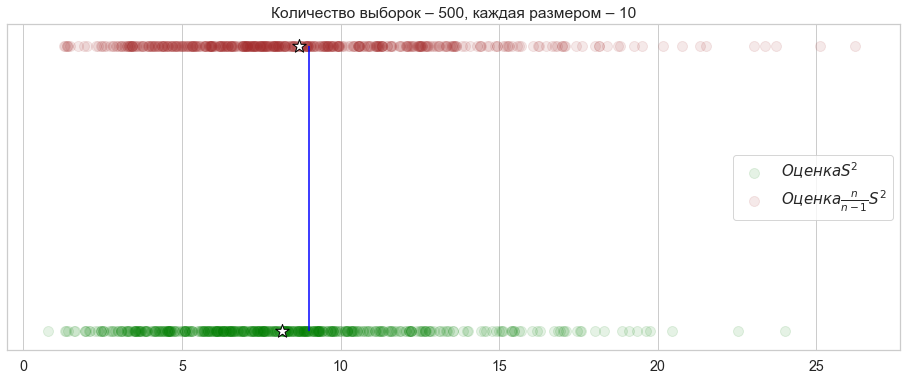

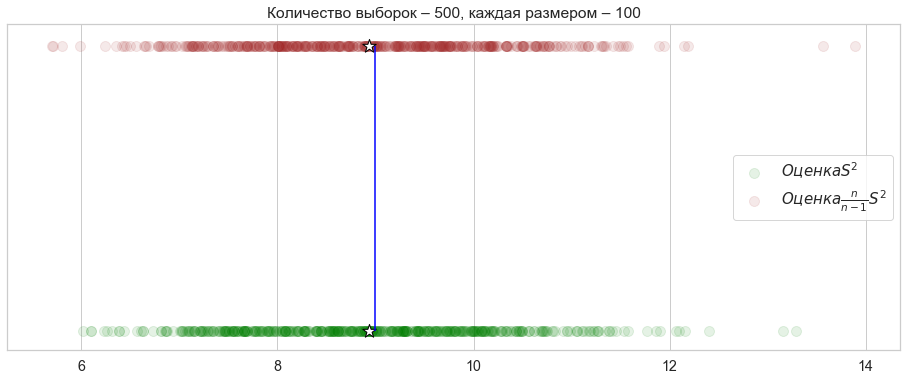

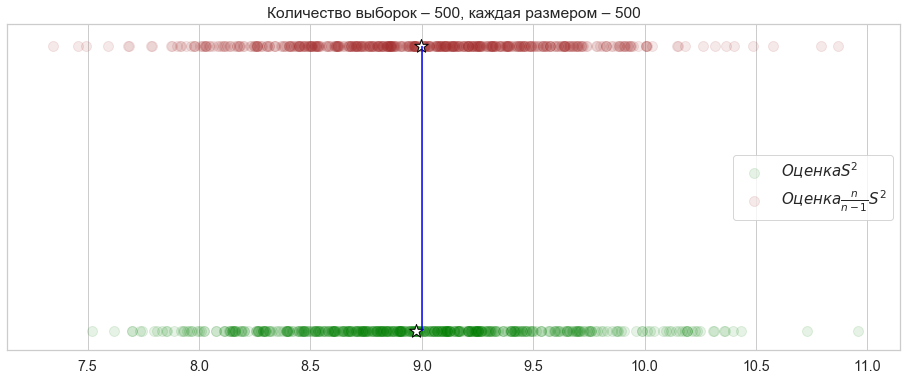

In [4]:
func1 = lambda x: (x**2).mean(axis=1) - (x.mean(axis=1))**2
func2 = lambda x: x.shape[1] / (x.shape[1] - 1) * func1(x)

draw_estimations([func1, func2])

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

In [5]:
n = 300
samples = sps.norm(scale=3).rvs(size=(k, n))

In [6]:
def draw_limits(funcs: list):
    colors = ['green', 'brown']
    labels = [r'$Оценка  S^2$', r'$ Оценка  \frac{n}{n-1}S^2$']
    plt.figure(figsize=(16, 6))

    for i in range(FUNCS_COUNT):
        plt.plot(funcs[i].mean(axis=0), color=colors[i], label=labels[i])

    plt.xlabel('Размер выборки (т.е. n)', fontsize=19)
    plt.ylabel(r'$Оценка \overline{\sigma^2}$', fontsize=19)
    plt.title(f'Количество выборок – {k}, размер каждой – n', fontsize=19)
    plt.legend(fontsize=14)
    plt.grid(True)
    return 

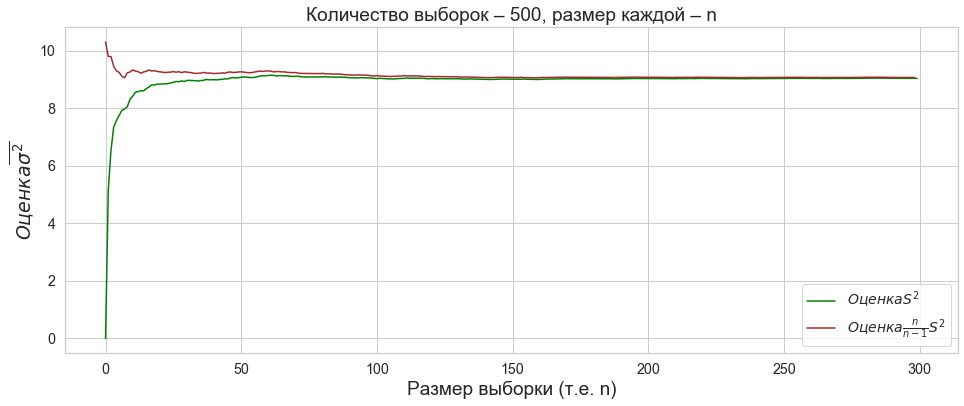

In [7]:
nums_n = np.arange(n)
estimation1 = (samples**2).cumsum(axis=1) / (nums_n + 1)  - (samples.cumsum(axis=1) / (nums_n + 1))**2
estimation2 = estimation1[:, 1:] * (nums_n[1:] + 1) / nums_n[1:] 

draw_limits([estimation1, estimation2])

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

1. Обе оценки  являются асимптотически несмещёнными, так как при увеличении n они сходятся к настоящему значению параметра.
2. Свойство несмещённости – свойство оценки сохранять $\mathsf{E}$ равным истинному значению параметра.
3. Эксперементы подтверждают, так как мы видим, что при малых n смещенная оценка далека от истинного значения параметра, и начинает приближаться к нему не так быстро.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

 ---
### Задача 3.   

В этой задаче вам нужно будет проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a>. Для сбора данных рекомендуется использовать <a target="_blank" href="https://dev.hh.ru/">официальное API</a>.

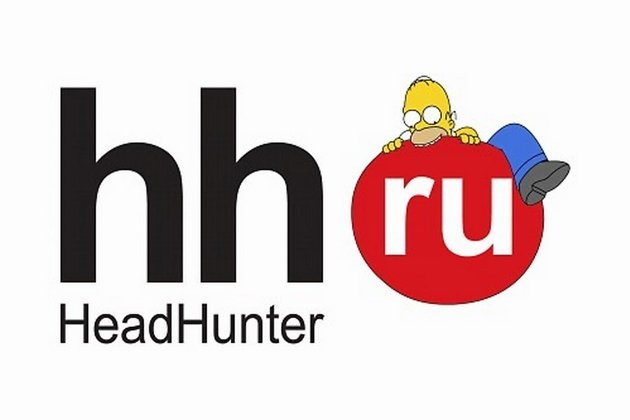

**1. Сбор данных**

Соберите данные о вакансии Data Scientist по Москве в одну таблицу и подготовьте их для анализа. Часто в индустрии подготовленные для анализа таблицы называют *витринами*. В ней должны быть:
- название вакансии,
- работодатель,   
- зарплатная вилка,  
- станция метро,   
- ссылка на вакансию,
- опыт,              
- требуемые навыки,   
- что-то еще по вашему желанию.

Креативность приветствуется. При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

**При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter.**

Пример запроса к API:

In [8]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Повар",
    'area': 1,
    'page': 1,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

In [9]:
print("Ключи из полученного словаря:\n", data.keys())

Ключи из полученного словаря:
 dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])


In [10]:
print("Пример одной вакансии из запроса:\n", data['items'][0])

Пример одной вакансии из запроса:
 {'id': '44069662', 'premium': False, 'name': 'Заведующий производством / Шеф-повар', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 150000, 'to': None, 'currency': 'RUR', 'gross': False}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'Булатниковская улица', 'building': '20', 'description': None, 'lat': 55.582955, 'lng': 37.627409, 'raw': 'Москва, Булатниковская улица, 20', 'metro': {'station_name': 'Пражская', 'line_name': 'Серпуховско-Тимирязевская', 'station_id': '9.116', 'line_id': '9', 'lat': 55.610962, 'lng': 37.602386}, 'metro_stations': [{'station_name': 'Пражская', 'line_name': 'Серпуховско-Тимирязевская', 'station_id': '9.116', 'line_id': '9', 'lat': 55.610962, 'lng': 37.602386}], 'id': '1518851'}, 'response_url': None, 'sort_point_distance': None, 'published_at': '2021-04-24T11:28:25+0

In [11]:
print("Ключи в описании вакансии:\n", data['items'][0].keys())

Ключи в описании вакансии:
 dict_keys(['id', 'premium', 'name', 'department', 'has_test', 'response_letter_required', 'area', 'salary', 'type', 'address', 'response_url', 'sort_point_distance', 'published_at', 'created_at', 'archived', 'apply_alternate_url', 'insider_interview', 'url', 'alternate_url', 'relations', 'employer', 'snippet', 'contacts', 'schedule', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary'])


In [12]:
df = pd.DataFrame(data['items'])
df.head(2) # посмотрим на данные в виде таблицы

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,44069662,False,Заведующий производством / Шеф-повар,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Булатниковская у...",...,https://hh.ru/vacancy/44069662,[],"{'id': '38383', 'name': 'Бутербродная компания...",{'requirement': 'знание современных тенденций ...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,44145021,False,Повар горячего цеха,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 70000, 'to': 90000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Шелепихинская на...",...,https://hh.ru/vacancy/44145021,[],"{'id': '3919188', 'name': 'Шелби', 'url': 'htt...",{'requirement': 'Опыт работы от 1 года. - Знан...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False


### Запросы по конкретным id вакансий

In [13]:
# сделаем тестовый запрос, чтобы посмотреть, как он выглядит
URL_1 = 'https://api.hh.ru/vacancies/44074510' 

req_1 = requests.get(URL_1)
data_1 = json.loads(req_1.content.decode())

In [14]:
data_1
# из словаря нам нужны 
# 1) 'name',
# 2) 'employer': 'name'
# 3) 'salary': 'from', 'to', 'currency', 'gross'
# 4) 'address': 'metro': 'station_name'
# 5) 'alternate_url'
# 6) 'experience' : 'name' or 'id'
# 7) 'key_skills'

{'id': '44074510',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Повар',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 60000, 'to': 70000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'улица Кржижановского',
  'building': '17к1',
  'description': None,
  'lat': 55.679275,
  'lng': 37.573492,
  'raw': 'Москва, улица Кржижановского, 17к1',
  'metro': {'station_name': 'Академическая',
   'line_name': 'Калужско-Рижская',
   'station_id': '6.3',
   'line_id': '6',
   'lat': 55.687147,
   'lng': 37.5723},
  'metro_stations': [{'station_name': 'Академическая',
    'line_name': 'Калужско-Рижская',
    'station_id': '6.3',
    'line_id': '6',
    'lat': 55.687147,
    'lng': 37.5723},
   {'station_name': 'Профсоюзная',
    'line_name': 'К

Напишем функцию, которая будет принимать словарь, который мы получаем в респонсе, и создавать новый словарь с только той информацией, которая нам нужна.

In [15]:
KEYS = ['id', 'vacancy_name', 'employer_name', 
        'sal_from', 'sal_to', 'sal_currency', 'sal_gross',
        'metro_name', 'lat', 'lng',
        'url', 'experience', 'key_skills']

In [16]:
def refactor_response_dict(response: dict) -> dict:
    result = dict.fromkeys(KEYS)

    result['id'] = response.get('id')
    result['vacancy_name'] = response.get('name')
    
    if response.get('employer') is not None:
        result['employer_name'] = response['employer'].get('name')
        
    if response.get('salary') is not None:
        result['sal_from'] = response['salary'].get('from')
        result['sal_to'] = response['salary'].get('to')
        result['sal_currency'] = response['salary'].get('currency')
        result['sal_gross'] = response['salary'].get('gross')
            
    if response.get('address') is not None:
        if response['address'].get('lat') is not None and \
           response['address'].get('lng') is not None:
            result['lng'] = response['address']['lng']
            result['lat'] = response['address']['lat']
            
        elif response['address'].get('metro') is not None:
            result['metro_name'] = response['address']['metro'].get('station_name')
            result['lat'] = response['address']['metro'].get('lat')
            result['lng'] = response['address']['metro'].get('lng')
        elif response['address'].get('metro_stations') is not None and \
            len(response['address']['metro_stations']) > 0:
                result['metro_name'] = response['address']['metro_stations'][0].get('station_name')
                result['lat'] = response['address']['metro_stations'][0].get('lat')
                result['lng'] = response['address']['metro_stations'][0].get('lng')


        
    result['url'] = response.get('alternate_url')
    
    if response.get('experience') is not None:
        result['experience'] = response['experience'].get('name')
        
    result_skills = str()
    if response.get('key_skills') is not None:
        for i, new_skill_dict in enumerate(response['key_skills']):
            if new_skill_dict.get('name') is not None:
                if i != 0:
                    result_skills += ", "
                result_skills += new_skill_dict['name']
    
    result['key_skills'] = result_skills
    return result

Протестируем функцию:

In [17]:
check = refactor_response_dict(data_1)
df = pd.DataFrame(check, index=[1])
df.head()

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills
1,44074510,Повар,Торговый Дом Гурман,60000,70000,RUR,False,None,55.679275,37.573492,https://hh.ru/vacancy/44074510,От 1 года до 3 лет,"Инвентаризация, Пользователь ПК, Контроль каче..."


### Скачиваем данные по вакансии Data Scientist

In [337]:
def get_df_from_api(vacancy_name: str, pages_num: int) -> pd.DataFrame:
    URL = 'https://api.hh.ru/vacancies'
    result_df = pd.DataFrame()
    for cur_page in range(pages_num):
        params = {
            'text': vacancy_name,
            'area': 1,
            'page': cur_page,
            'per_page': 100
        }

        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        
        if not req.ok:
            return result_df

        tmp_df = pd.DataFrame(data['items'])
        result_df = result_df.append(tmp_df, ignore_index=True)
        print(f"После страницы {cur_page + 1} размер:", result_df.shape)
        sleep(10)
        
    print("В результате получилось столько вакансий", result_df.shape)
    return result_df

In [15]:
# ds_df_origin = get_df_from_api("Data Scientist", 36) # don't call this func twice
# ds_df = ds_df_origin.copy()
# ds_df.head(3)

После страницы 1 размер: (10, 28)
После страницы 2 размер: (20, 28)
После страницы 3 размер: (30, 28)
После страницы 4 размер: (40, 28)
После страницы 5 размер: (50, 28)
После страницы 6 размер: (60, 28)
После страницы 7 размер: (70, 28)
После страницы 8 размер: (80, 28)
После страницы 9 размер: (90, 28)
После страницы 10 размер: (100, 28)
После страницы 11 размер: (110, 28)
После страницы 12 размер: (120, 28)
После страницы 13 размер: (130, 28)
После страницы 14 размер: (140, 28)
После страницы 15 размер: (150, 28)
После страницы 16 размер: (160, 28)
После страницы 17 размер: (170, 28)
После страницы 18 размер: (180, 28)
После страницы 19 размер: (190, 28)
После страницы 20 размер: (200, 28)
После страницы 21 размер: (210, 28)
После страницы 22 размер: (220, 28)
После страницы 23 размер: (230, 28)
После страницы 24 размер: (240, 28)
После страницы 25 размер: (250, 28)
После страницы 26 размер: (260, 28)
После страницы 27 размер: (270, 28)
После страницы 28 размер: (280, 28)
После стра

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,44150000,False,Стажер data scientist,"{'id': 'sbr-3809-sibb', 'name': 'Сибур'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/44150000,[],"{'id': '3809', 'name': 'СИБУР, Группа компаний...",{'requirement': 'Студент 4-го курса бакалавриа...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,44132320,False,Аналитик Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 180000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/44132320,[],"{'id': '320191', 'name': 'Стоматорг', 'url': '...","{'requirement': 'Работа в формате skrum, удале...",None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
2,43896076,False,Data Scientist в области компьютерного зрения,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 150000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/43896076,[],"{'id': '3535293', 'name': 'Fair Print & High S...","{'requirement': None, 'responsibility': 'Срок ...",None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True


 Сохраним полученные данные из `pd.DataFrame` в `.json` файл.

In [16]:
# ds_df.to_json(r'./raw_vacancies_list.json')

In [13]:
# check = pd.read_json(r'./raw_vacancies_list.json')
# print(check.shape)
# check.head()

## Формирование таблички с необходимыми данными
Пройдемся по стобцу `id` из таблицы `ds_df`, которую мы получили по запросу профессии `Data Scientist` на `hh.api` и сделаем по каждому `id` отдельный запрос и сформируем итоговую таблицу с необходимыми нам данными. 

In [15]:
def get_df_with_useful_info_from_vacancies(df: pd.DataFrame, 
                                           save_raw: bool = False) -> tuple():
    result = pd.DataFrame()
    raw = list()
    for i, new_id in enumerate(df.id):
        id_url = f'https://api.hh.ru/vacancies/{new_id}' 

        req = requests.get(id_url)
        data = json.loads(req.content.decode())
            
        if save_raw:
            raw.append(data)

        new_row = refactor_response_dict(data)
        df_tmp = pd.DataFrame(new_row, index=[0])
        result = result.append(df_tmp, ignore_index=True)
        sleep(2)
        
    return result, raw

In [21]:
# processed_df, raw = get_df_with_useful_info_from_vacancies(ds_df, False)
# processed_df_copy = processed_df.copy()
processed_df_copy = pd.read_json('nice_every_vacancy_ds.json')
processed_df_copy.head()

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills
0,44150000,Стажер data scientist,"СИБУР, Группа компаний",NaN,NaN,None,NaN,None,NaN,NaN,https://hh.ru/vacancy/44150000,Нет опыта,"Python, SQL, R, machine learning"
1,44132320,Аналитик Data Scientist,Стоматорг,180000.0,250000.0,RUR,1.0,None,NaN,NaN,https://hh.ru/vacancy/44132320,От 1 года до 3 лет,"Python, MS Visio, Бизнес-анализ, Аналитические..."
2,43896076,Data Scientist в области компьютерного зрения,Fair Print & High Store,150000.0,150000.0,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/43896076,Нет опыта,"C++, Тестирование, MATLAB, Гарант плюс, Бизнес..."
3,43471916,Data Scientist / Quantitative Researcher,Знаменка Капитал,250000.0,NaN,RUR,1.0,Кропоткинская,55.745297,37.604217,https://hh.ru/vacancy/43471916,От 3 до 6 лет,"Mathematical Statistics, Mathematical Programm..."
4,43825932,Junior Data Scientist,Институт прикладных экономических исследований...,120000.0,NaN,RUR,1.0,None,55.665477,37.473303,https://hh.ru/vacancy/43825932,От 1 года до 3 лет,"PyTorch, TensorFlow, Scikit-learn, xgboost, Py..."


In [22]:
processed_df_copy.shape

(338, 13)

Сохраним сырые данные по каждой вакансии в `.json`.

In [29]:
# with open('raw_every_vacancy_id.json', 'w') as file:
#     json.dump(raw, file)

Проверим правильность сохранения данных:

In [23]:
# check_df = pd.read_json('raw_every_vacancy_id.json')
# print(check_df.shape)
# check_df.head(2)

**2. Анализ и визуализация данных**

Проведите исследование получившихся данных. Прежде всего убедитесь, что ваши данные чистые. Убедитесь, что вы проделали следующее:
- удаление дубликатов,
- предобработка пропусков,
- предобработка текстовых данных.

Среди вакансий можно выделять группы. *Например*, бизнес-аналитик, BI аналитик, продуктовый аналитик.

Ответьте не следующие вопросы:  
- Сколько сейчас доступно вакансий по вашему запросу?
- Выделяются ли среди вакансий какие-то группы? 
- Какие группы вакансий самые популярные?
- Какова средняя и медианная заработная плата?
- Какие ключевые навыки требуются для данной вакансии?
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию &mdash; для этого используйте библиотеку plotly. Постройте следующие графики:
- гистограмма распределения заработной платы;
- heatmap, отображающий зависимость количества вакансий от группы и навыка;
- зависимость средней заработной платы от требуемых навыков;
- распределение средней заработной платы по карте Москвы;
- распределение спроса на вакансию по карте Москвы.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="http://www.lovrikinfo.ru/metrogps.php">внешние данные</a>.


### Проверим, что данные чистые.

In [97]:
pr_df = processed_df_copy.drop_duplicates(ignore_index=True)
print(pr_df.shape)
pr_df.tail(5)

(338, 13)


,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills
333,43369577,Руководитель направления разработки моделей оц...,Сбербанк,NaN,NaN,None,NaN,None,NaN,NaN,https://hh.ru/vacancy/43369577,От 1 года до 3 лет,
334,41733915,"Client Consultant (market research, FMCG sector)",NielsenIQ,NaN,NaN,None,NaN,None,55.826751,37.444925,https://hh.ru/vacancy/41733915,От 1 года до 3 лет,"Market Research, Маркетинговые исследования, А..."
335,43373281,Data Scientist в департамент по работе с пробл...,Сбербанк,NaN,NaN,None,NaN,None,NaN,NaN,https://hh.ru/vacancy/43373281,От 1 года до 3 лет,
336,42916086,Product Manager (Analytics),Segmento,NaN,NaN,None,NaN,None,NaN,NaN,https://hh.ru/vacancy/42916086,От 3 до 6 лет,"Python, Agile Project Management, Scrum, Googl..."
337,42779428,Java Developer (Система управления знаниями и ...,Сбербанк,NaN,NaN,None,NaN,None,55.741338,37.531127,https://hh.ru/vacancy/42779428,От 1 года до 3 лет,"Git, Hibernate ORM, XML, Atlassian Jira, Java"


In [98]:
print("Доступно вакансий", pr_df.shape[0])

Доступно вакансий 338


In [99]:
GROUPS = {
    'analytic': ['аналитик', 'analyst', 'analytic', 'анализу данных', 'анализ данных'],
    'consultant': ['consultant', 'assistant', 'market', 'client', 'manager'],
    'different ml': ['nlp', 'cv', 'машинное обучение', 'ml', 'machine learning',
                    'зрен'],
    'engineer': ['developer', 'engineer', 'инженер', 'разработчик'],
    'research': ['research'],
    'data scientist': ['data scientist'],
    'recruiter': ['recruite', 'рекрутер']
}

In [100]:
# pr_df['group'] = 'other'
pr_df.head(5)

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills
0,44150000,Стажер data scientist,"СИБУР, Группа компаний",NaN,NaN,None,NaN,None,NaN,NaN,https://hh.ru/vacancy/44150000,Нет опыта,"Python, SQL, R, machine learning"
1,44132320,Аналитик Data Scientist,Стоматорг,180000.0,250000.0,RUR,1.0,None,NaN,NaN,https://hh.ru/vacancy/44132320,От 1 года до 3 лет,"Python, MS Visio, Бизнес-анализ, Аналитические..."
2,43896076,Data Scientist в области компьютерного зрения,Fair Print & High Store,150000.0,150000.0,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/43896076,Нет опыта,"C++, Тестирование, MATLAB, Гарант плюс, Бизнес..."
3,43471916,Data Scientist / Quantitative Researcher,Знаменка Капитал,250000.0,NaN,RUR,1.0,Кропоткинская,55.745297,37.604217,https://hh.ru/vacancy/43471916,От 3 до 6 лет,"Mathematical Statistics, Mathematical Programm..."
4,43825932,Junior Data Scientist,Институт прикладных экономических исследований...,120000.0,NaN,RUR,1.0,None,55.665477,37.473303,https://hh.ru/vacancy/43825932,От 1 года до 3 лет,"PyTorch, TensorFlow, Scikit-learn, xgboost, Py..."


In [101]:
def guess_group(vacancy_name: str) -> str:
    for group_name, patterns in GROUPS.items():
        for pattern in patterns:
            if pattern in vacancy_name.lower():
                return group_name
    return 'other'

In [102]:
pr_df['group'] = pr_df['vacancy_name'].transform(lambda x: guess_group(x))

In [103]:
pr_df.head(3)

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills,group
0,44150000,Стажер data scientist,"СИБУР, Группа компаний",NaN,NaN,None,NaN,None,NaN,NaN,https://hh.ru/vacancy/44150000,Нет опыта,"Python, SQL, R, machine learning",data scientist
1,44132320,Аналитик Data Scientist,Стоматорг,180000.0,250000.0,RUR,1.0,None,NaN,NaN,https://hh.ru/vacancy/44132320,От 1 года до 3 лет,"Python, MS Visio, Бизнес-анализ, Аналитические...",analytic
2,43896076,Data Scientist в области компьютерного зрения,Fair Print & High Store,150000.0,150000.0,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/43896076,Нет опыта,"C++, Тестирование, MATLAB, Гарант плюс, Бизнес...",different ml


In [104]:
def show_groups(pr_df: pd.DataFrame):
    groups_count = pr_df.groupby('group')['url'].count().sort_values()
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Количество вакансий данной группы',
        fontsize = 20
    )
    axis.set_ylabel('Название группы', fontsize=20)
    
    axis.pie(
        groups_count.values,
        labels=groups_count.index,
        autopct='%1.1f%%'
    )
    axis.axis('equal')
    plt.show()
    return 

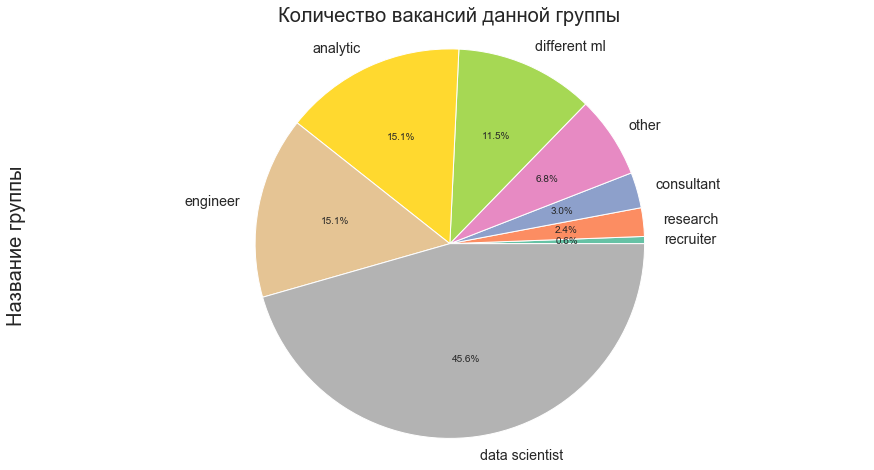

In [105]:
show_groups(pr_df)

Как видим самые популярные группы вакансий это:
1. "Чистый" Data scientist (при обработке я считал, что это тот, кто конкретно только работает с данными(достает и подготавливает их) и у кого в имени вакансии не требуется знаний ml или инженерных скилов)
2. Data scientist с требованием инженерных скилов.
3. Аналитик, то есть тот, кто уже, возможно, не только достает данные, но и ищет в них какую-то полезную для компании информацию.
4. Вакансии требующие знания и работы с различными областями ML (NLP, CV, base ml)

#### Средняя и медианная заработная плата
Чтобы посчитать это будем действовать так: во-первых, нужно учесть `gross`, нашел в интернете примерную формулу для расчета чистой зарплаты $чистая = грязная \times 0,67$. Во-вторых, если в строке есть нижняя и верхняя границы для вилки, то берем среднее, если какой-то из границ нет, то будем считать, что это и есть средняя зарплата для данной работы. Также захардкодим курс ЦБ `EUR` и `USD` на 23  апреля.

In [106]:
pr_df.groupby('sal_currency').groups

{'EUR': Int64Index([7, 12], dtype='int64'),
 'RUR': Int64Index([  1,   2,   3,   4,   6,   8,  14,  15,  17,  21,  23,  39,  41,
              76,  80, 103, 111, 116, 119, 121, 123, 127, 133, 182, 192, 208,
             218, 222, 225, 229, 232, 268, 270, 273, 274, 280, 283, 285, 295,
             301, 307, 309, 311, 314],
            dtype='int64'),
 'USD': Int64Index([18, 55, 117, 129, 154, 212, 267, 315], dtype='int64')}

In [107]:
CURRENCY = {
    'EUR': 92.0423,
    'USD': 76.4217,
    'RUR': 1
}

In [108]:
def sal_func(x):
#     print(x)
    coef = 0.67 if x['sal_gross'] == 1 else 1
    for currency, rate in CURRENCY.items():
        if x['sal_currency'] == currency:
            coef *= rate
        
    if x['sal_from'] and x['sal_to']:
        return (x['sal_to'] + x['sal_from']) / 2 * coef
    elif x['sal_from'] is not None or x['sal_to'] is not None:
        sal = x['sal_from'] if x['sal_from'] is not None else x['sal_to']
        return sal * coef
    else:
        return None

In [109]:
pr_df['sal_RUR'] = pr_df.apply(sal_func, axis=1)
pr_df.head()

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills,group,sal_RUR
0,44150000,Стажер data scientist,"СИБУР, Группа компаний",NaN,NaN,None,NaN,None,NaN,NaN,https://hh.ru/vacancy/44150000,Нет опыта,"Python, SQL, R, machine learning",data scientist,NaN
1,44132320,Аналитик Data Scientist,Стоматорг,180000.0,250000.0,RUR,1.0,None,NaN,NaN,https://hh.ru/vacancy/44132320,От 1 года до 3 лет,"Python, MS Visio, Бизнес-анализ, Аналитические...",analytic,144050.0
2,43896076,Data Scientist в области компьютерного зрения,Fair Print & High Store,150000.0,150000.0,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/43896076,Нет опыта,"C++, Тестирование, MATLAB, Гарант плюс, Бизнес...",different ml,150000.0
3,43471916,Data Scientist / Quantitative Researcher,Знаменка Капитал,250000.0,NaN,RUR,1.0,Кропоткинская,55.745297,37.604217,https://hh.ru/vacancy/43471916,От 3 до 6 лет,"Mathematical Statistics, Mathematical Programm...",research,NaN
4,43825932,Junior Data Scientist,Институт прикладных экономических исследований...,120000.0,NaN,RUR,1.0,None,55.665477,37.473303,https://hh.ru/vacancy/43825932,От 1 года до 3 лет,"PyTorch, TensorFlow, Scikit-learn, xgboost, Py...",data scientist,NaN


In [110]:
pr_df['sal_RUR'].describe()

count        19.000000
mean     173650.985921
std       80713.329366
min       45000.000000
25%      134000.000000
50%      150750.000000
75%      203504.760625
max      382108.500000
Name: sal_RUR, dtype: float64

По тем данным что у нас есть, средняя зарплата - `173650р.`, а медианная - `150750р.`.

#### Какие ключевые навыки требуются для данной вакансии.
Пройдемся по столбцу с ключевыми навыками, разобьем все по `,` будем добавлять в словарь если такого навыка в нем еще нет, а если есть увеличивать счетчик на 1.

In [111]:
result_skills_dict = dict()

In [112]:
def count_skills(skills_str: str):
    skills_list = skills_str.split(', ')
    for skill in skills_list:
        if result_skills_dict.get(skill) is not None:
            result_skills_dict[skill] += 1
        else: 
            result_skills_dict[skill] = 1

In [113]:
pr_df['key_skills'].apply(count_skills)

0      None
1      None
2      None
3      None
4      None
       ... 
333    None
334    None
335    None
336    None
337    None
Name: key_skills, Length: 338, dtype: object

In [114]:
skills_df = pd.DataFrame.from_dict(result_skills_dict, orient='index')
skills_df.sort_values(inplace=True, by=[0], ascending=False)
skills_df.head(15)

,0
Python,192
SQL,123
,87
Data Mining,58
Английский язык,37
Git,35
Linux,33
Математическая статистика,30
Spark,28
C++,25


In [115]:
# это те вакансии где не указаны ключевые навыки 
skills_df.drop(index='', inplace=True) 

Как видим топ-3 необходимых скилов это:
1. Python
2. SQL
3. Data Mining

#### Какой опыт требуется для данной вакансии

In [116]:
exp_groups = pr_df.groupby('experience')['id'].count().sort_values(ascending=False)
exp_groups

experience
От 1 года до 3 лет    151
От 3 до 6 лет         140
Нет опыта              34
Более 6 лет            13
Name: id, dtype: int64

Как видим в наибольшем числе вакансий требуется опыт работы `от 1 до 3 лет`.

####  Какие работодатели в топе?

In [117]:
employer_groups = pr_df.groupby('employer_name')['id'].count().sort_values(ascending=False)
employer_groups[employer_groups > 4]

employer_name
Сбербанк          54
Ozon               9
РАБЛЗ              8
МегаФон            6
Mail.ru Group      5
Банк ВТБ (ПАО)     5
NielsenIQ          5
Name: id, dtype: int64

Наибольшее количество вакансий предлагает `Сбербанк`.

#### В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

In [118]:
pr_df.metro_name.notnull().sum()

15

In [119]:
pr_df.lat.notnull().sum()

148

In [120]:
districts_groups = pr_df.groupby('metro_name')['id'].count().sort_values(ascending=True)
districts_groups

metro_name
Академическая             1
Аэропорт                  1
Балтийская                1
Бауманская                1
Белорусская               1
Кропоткинская             1
Кузнецкий мост            1
Парк культуры             1
Тульская                  1
Кутузовская               2
Ломоносовский проспект    2
Перово                    2
Name: id, dtype: int64

Как видим, у нас сильно много пропусков в данных по метро, поэтому будем использовать полученные координаты, чтобы попробовать угадать ближайшее метро. Будем считать квадраты разности дологты и широты до теоретического метро. Для координат метро Москвы будем использовать внешние данные, которые были предложены в задании. Превратить в `csv` [помог](https://www.convertcsv.com/csv-viewer-editor.htm). 

In [121]:
METRO_STATIONS = pd.read_csv('metro_coordinates.csv', sep=',')
METRO_STATIONS.head(2)

,metro_name,lng,lat
0,Аэропорт,55.79981,37.53412
1,Академическая,55.68808,37.57501


In [122]:
metro_stations_count = METRO_STATIONS.set_index('metro_name')
metro_stations_count['count'] = 0
metro_stations_count.head(2)

,lng,lat,count
metro_name,,,
Аэропорт,55.79981,37.53412,0
Академическая,55.68808,37.57501,0


In [123]:
def count_metroes_ds(row):
    if row.metro_name is not None:
        if row.metro_name in metro_stations_count.index:
            metro_stations_count.loc[row.metro_name, 'count'] += 1
    elif row.lat is not None and row.lng is not None:
#         print(row.lng, row.lat)
        metro_stations_count['dist'] = np.sqrt((metro_stations_count.lng - row.lng)**2 +\
                                        (metro_stations_count.lat - row.lat)**2)
#         print(metro_stations_count['dist'].min(), metro_stations_count.iloc[110, 3])
        metro_min = metro_stations_count['dist'].argmin()
#         print(metro_min)
        metro_stations_count.iloc[metro_min, 2] += 1

In [124]:
pr_df.apply(count_metroes_ds, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
333    None
334    None
335    None
336    None
337    None
Length: 338, dtype: object

In [125]:
metro_stations_count.drop(columns='dist', inplace=True)

In [126]:
metro_stations_count.sort_values(by='count', ascending=False).head(7)

,lng,lat,count
metro_name,,,
Южная,55.621220,37.607520,190.0
Красногвардейская,55.614491,37.744724,130.0
Перово,55.751090,37.788540,2.0
Кутузовская,55.739470,37.534330,2.0
Бульвар Дмитрия Донского (стр.),55.567759,37.575724,2.0
Белорусская,55.774920,37.582070,1.0
Тульская,55.709010,37.622600,1.0


К сожалению, как видно, так у меня получилась какая-то ерунда, в чем проблема я так и не смог найти, поэтому придется прикидывать все на глаз. А ведь дальше можно было бы объединить станции по районам и нормально понять в каком районе больше вакансий.

Будем пользоваться этой картинкой.
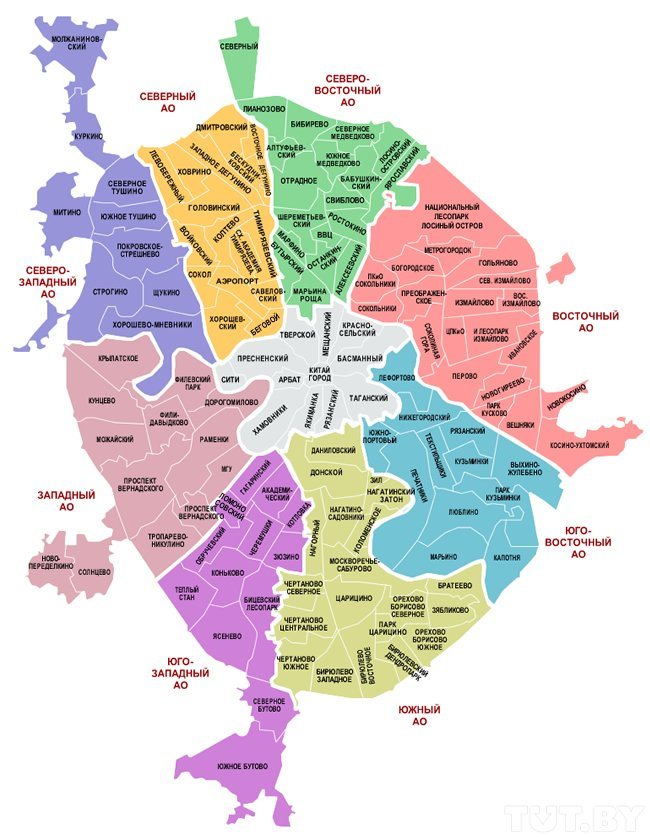

Итак, кажется, что в центральном и южном АО вакансий больше, чем в остальных. Наименьшим в Юго-Восточном, Восточном. (график смотри ниже в разделе с графиками)

#### Гистограмма распределения заработной платы

In [127]:
def salary_hist(df: pd.DataFrame):
    fig = px.histogram(
        df, 
        x="sal_RUR",
        nbins=20)
    
    fig.update_layout(
        title_text='Гистограмма распределения заработной платы',
        title_font_size=20,
        xaxis_title='Заработная плата',
        yaxis_title='Количество вакансий' 
    )
    
    fig.show()

In [128]:
salary_hist(pr_df)

#### Heatmap, отображающий зависимость количества вакансий от группы и навыка
Всего различных навыков 348, все они на график конечно не поместятся, поэтмоу я оставлю только топ-15 и сгруппировав по группе буду считать только их количество для группы. 

In [130]:
SKILLS_TOP15 = list(skills_df.iloc[:15].index)
print(SKILLS_TOP15)

['Python', 'SQL', 'Data Mining', 'Английский язык', 'Git', 'Linux', 'Математическая статистика', 'Spark', 'C++', 'Анализ данных', 'Hadoop', 'MS SQL', 'Machine Learning', 'Big Data', 'Математическое моделирование']


In [131]:
groups_to_skills = pd.DataFrame(index=SKILLS_TOP15, columns=GROUPS.keys(), dtype=np.int64)
groups_to_skills.fillna(value=0, inplace=True)
groups_to_skills.head(2)

,analytic,consultant,different ml,engineer,research,data scientist,recruiter
Python,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SQL,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
def generate_skills_dict(row):
    skills_list = row['key_skills'].split(', ')
    for skill in skills_list:
        if skill in SKILLS_TOP15:
                groups_to_skills.loc[skill, row['group']] += 1

In [133]:
def build_pivot_skills_to_groups():
    i = 1
    for cur_group in GROUPS.keys():
        tmp_df = pr_df[pr_df['group'] == cur_group]
        tmp_df.apply(generate_skills_dict, axis=1)

In [134]:
build_pivot_skills_to_groups()

In [135]:
groups_to_skills

,analytic,consultant,different ml,engineer,research,data scientist,recruiter
Python,25.0,2.0,26.0,32.0,5.0,94.0,0.0
SQL,16.0,2.0,10.0,22.0,0.0,66.0,0.0
Data Mining,10.0,2.0,3.0,3.0,1.0,37.0,0.0
Английский язык,15.0,2.0,2.0,1.0,1.0,14.0,0.0
Git,0.0,2.0,11.0,10.0,0.0,9.0,0.0
Linux,2.0,0.0,12.0,7.0,0.0,11.0,0.0
Математическая статистика,6.0,0.0,2.0,1.0,1.0,18.0,0.0
Spark,0.0,0.0,6.0,12.0,0.0,8.0,0.0
C++,3.0,0.0,5.0,0.0,1.0,14.0,0.0
Анализ данных,5.0,0.0,2.0,1.0,0.0,14.0,0.0


In [136]:
groups_to_skills.replace(0, np.nan, inplace=True)
groups_to_skills.head(3)

,analytic,consultant,different ml,engineer,research,data scientist,recruiter
Python,25.0,2.0,26.0,32.0,5.0,94.0,NaN
SQL,16.0,2.0,10.0,22.0,NaN,66.0,NaN
Data Mining,10.0,2.0,3.0,3.0,1.0,37.0,NaN


In [137]:
def show_heatmap(df: pd.DataFrame, zmin: int=10, zmax: int=20):
    fig = go.Figure()

    fig.add_trace(
        go.Heatmap(
            z=df,
            x=df.columns, 
            y=df.index,
            colorscale='Viridis',
            zmax=zmax,
            zmin=zmin
        )
    )

    fig.update_layout(
        height=900, width=900, 
        title_text='Зависимость количества вакансий от группы и навыка', 
        title_font_size=16, 
        xaxis_title='Группа вакансий',
        yaxis_title='Требуемые навыки'
    )

    fig.show()

In [138]:
show_heatmap(groups_to_skills)

#### Зависимость средней заработной платы от требуемых навыков
Берем навык `x` смотрим те вакансии, которые его требуют, среди них смотрим заработную плату.

In [140]:
def show_sal_avg_to_skills():
    skill_to_avg_df = pd.DataFrame(index=SKILLS_TOP15, columns=['average_salary'])
    for skill in SKILLS_TOP15:
        df_for_skill = pr_df[pr_df['key_skills'].str.contains(skill, regex=False)]
        skill_to_avg_df.loc[skill, 'average_salary'] = df_for_skill['sal_RUR'].mean()
    
    fig = px.scatter(skill_to_avg_df, x=skill_to_avg_df.index, y="average_salary")
    fig.update_layout(
        height=600, width=1000, 
        title_text='Зависимость средней заработной платы от требуемых навыков', 
        title_font_size=16, 
        xaxis_title='Навык в вакансии',
        yaxis_title='Средняя зарплата'
    )
    fig.show()
    return

In [141]:
show_sal_avg_to_skills()

#### Распределение средней заработной платы по карте Москвы

In [142]:
def visualize_vacancies_with_sal(df: pd.DataFrame, vacancy_name: str,
                                cnt_lat, cnt_lon, zoom):
    df_tmp = df[df['sal_RUR'].notnull()]
    fig = px.scatter_mapbox(
        df_tmp,
        lat='lat', lon='lng', 
        color='sal_RUR',
        hover_name="vacancy_name",
        color_continuous_scale=px.colors.cyclical.IceFire,
        center=dict(lat=cnt_lat, lon=cnt_lon),
        zoom=zoom,
        size_max=20,
        mapbox_style="carto-positron"
        
    )
    
    fig.update_layout(
        title=f'Расположение вакансий {vacancy_name} c зарплатой на карте Москвы'
    )
    fig.show()
    return 

In [143]:
visualize_vacancies_with_sal(pr_df, "Data Scientist", zoom=9.8, cnt_lat=55.72, cnt_lon=37.65)

К сожалению, в данных много пропусков, поэтому на карте не так много вакансий, у которых есть и определенная зарплата и долгота и широта.

#### Распределение спроса на вакансию по карте Москвы

In [145]:
def visualize_all_vacancies(df: pd.DataFrame, vacancy_name: str,
                           cnt_lat, cnt_lon, zoom):
    fig = px.scatter_mapbox(
        df,
        lat='lat', lon='lng',
        hover_name="vacancy_name",
        color_discrete_sequence=["fuchsia"],
        center=dict(lat=cnt_lat, lon=cnt_lon),
        zoom=zoom,
        size_max=20,
        mapbox_style="carto-positron"
    )
    
    fig.update_layout(
        title=f'Расположение вакансий {vacancy_name} на карте Москвы',
        showlegend=False
    )
    fig.show()
    return 

In [146]:
visualize_all_vacancies(pr_df, "Data Scientist", zoom=9.6, cnt_lat=55.75, cnt_lon=37.63)

Какие выводы можно сделать из построенных графиков?

1. Нужно учить `Python`, `SQL` и набираться опыта в `Data Mining'e`, потому что они очень сильно востребованы в профессии.
2. Сложно судить о зависимости навыка и средней зарплаты, потому что некоторые навыки относительно мало где нужны и поэтому средняя зарплата по ним не такая говорящая, зато по ТОП-3 скилам, которые перечислил выше, можно сказать, что у них высокая средняя зарплата около `200т.р.` 
3. Большинство вакансий расположены в центральном и южном округах.
4. Python и SQL более менее универсальны, то есть почти во всех группах, которые я выделил, они очень востребованы, Data Mining же больше востребован в тех вакансиях, где ничего другого кроме DataScience не сказано.

**3. Анализ профессии, о которой вы мечтали в детстве**

Проведите аналогичное исследование для профессии, о которой вы мечтали в детстве. Это может быть повар, учитель, пожарный и т.д. &mdash; все зависит от вас ☺.

Буду исследовать профессию повара.

In [338]:
# cook_origin = get_df_from_api("Повар", 40) # don't call this func twice
# cook_df = cook_origin.copy()
# cook_df.head(3)

После страницы 1 размер: (100, 28)
После страницы 2 размер: (200, 28)
После страницы 3 размер: (300, 28)
После страницы 4 размер: (400, 28)
После страницы 5 размер: (500, 28)
После страницы 6 размер: (600, 29)
После страницы 7 размер: (700, 29)
После страницы 8 размер: (800, 29)
После страницы 9 размер: (900, 29)
После страницы 10 размер: (1000, 29)
После страницы 11 размер: (1100, 29)
После страницы 12 размер: (1200, 29)
После страницы 13 размер: (1300, 29)
После страницы 14 размер: (1400, 29)
После страницы 15 размер: (1500, 29)
После страницы 16 размер: (1600, 29)
После страницы 17 размер: (1700, 29)
После страницы 18 размер: (1800, 29)
После страницы 19 размер: (1900, 29)
После страницы 20 размер: (2000, 29)


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,immediate_redirect_url
0,44167231,False,Бренд Шеф-повар,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 350000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,[],"{'id': '2722950', 'name': 'Фуд-холл Гоголь-Мог...",{'requirement': 'Продолжительный (не менее 3х ...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN
1,43428486,False,Повар универсал в ресторан премиум класса,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ружейный переуло...",...,[],"{'id': '2841043', 'name': 'Рико', 'url': 'http...","{'requirement': 'Аккуратность, чистоплотность....",None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN
2,43970396,False,Повар в ресторан Премиум класса,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 55000, 'to': 80000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Трёхпрудный пере...",...,[],"{'id': '5284457', 'name': 'Butler', 'url': 'ht...",{'requirement': 'Опыт работы в ресторанах Прем...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN


In [341]:
# cook_df.to_json(r'./raw_vacancies_cook_list.json')

In [148]:
# cook_pr_df, raw = get_df_with_useful_info_from_vacancies(cook_df, True)
cook_df_copy = pd.read_json('nice_every_vacancy_cook_id.json')
cook_df_copy.head()

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills
0,44167231,Бренд Шеф-повар,Фуд-холл Гоголь-Моголь,350000.0,NaN,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/44167231,Более 6 лет,
1,43428486,Повар универсал в ресторан премиум класса,Рико,100000.0,NaN,RUR,0.0,None,55.743786,37.580921,https://hh.ru/vacancy/43428486,Более 6 лет,Поварское дело
2,43970396,Повар в ресторан Премиум класса,Butler,55000.0,80000.0,RUR,0.0,None,55.766081,37.595591,https://hh.ru/vacancy/43970396,От 3 до 6 лет,"Контроль качества, Работа в команде, Инвентари..."
3,43821452,Повар-универсал,Под небом,70000.0,NaN,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/43821452,От 1 года до 3 лет,
4,43393079,Повар,HULAB,110000.0,130000.0,RUR,1.0,None,NaN,NaN,https://hh.ru/vacancy/43393079,От 3 до 6 лет,"Европейская кухня, Кавказская кухня, Итальянск..."


In [150]:
# with open('raw_every_vacancy_cook_id.json', 'w') as file:
#     json.dump(raw, file)
# check_df = pd.read_json('raw_every_vacancy_id.json')
# print(check_df.shape)
# check_df.head(2)

In [347]:
# cook_df_copy.to_json('nice_every_vacancy_cook_id.json')

### Проверим, что данные чистые

In [151]:
pr_df_cook = cook_df_copy.drop_duplicates(ignore_index=True)
pr_df_cook.head(5)

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills
0,44167231,Бренд Шеф-повар,Фуд-холл Гоголь-Моголь,350000.0,NaN,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/44167231,Более 6 лет,
1,43428486,Повар универсал в ресторан премиум класса,Рико,100000.0,NaN,RUR,0.0,None,55.743786,37.580921,https://hh.ru/vacancy/43428486,Более 6 лет,Поварское дело
2,43970396,Повар в ресторан Премиум класса,Butler,55000.0,80000.0,RUR,0.0,None,55.766081,37.595591,https://hh.ru/vacancy/43970396,От 3 до 6 лет,"Контроль качества, Работа в команде, Инвентари..."
3,43821452,Повар-универсал,Под небом,70000.0,NaN,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/43821452,От 1 года до 3 лет,
4,43393079,Повар,HULAB,110000.0,130000.0,RUR,1.0,None,NaN,NaN,https://hh.ru/vacancy/43393079,От 3 до 6 лет,"Европейская кухня, Кавказская кухня, Итальянск..."


In [152]:
print("Доступно вакансий", pr_df_cook.shape[0])

Доступно вакансий 2000


In [153]:
COOK_GROUPS = {
    'universal':['универсал'],
    
    'personal': ['личный', 'семью', 'семей', 'дети', 'детей'],
    'sushi': ['суши', 'sushi'],
    'garde_manger': ['горячего', 'горячий'],
    'cold_shop': ['холодного', 'холодный'],
    'head': ['шеф', 'старший', 'су'],
    'butcher': ['мясник'],
    'prep': ['заготов', 'заготовк'],
    'fast_food':['пиццы', 'пицца', 'быстрое', 'бургер', 'столов'],
    'pastry': ['сладк', 'пекар', 'кондитер'],
    'grill': ['гриль']
}

In [154]:
pr_df_cook['group'] = 'other'
pr_df_cook.head(4)

,id,vacancy_name,employer_name,sal_from,sal_to,sal_currency,sal_gross,metro_name,lat,lng,url,experience,key_skills,group
0,44167231,Бренд Шеф-повар,Фуд-холл Гоголь-Моголь,350000.0,NaN,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/44167231,Более 6 лет,,other
1,43428486,Повар универсал в ресторан премиум класса,Рико,100000.0,NaN,RUR,0.0,None,55.743786,37.580921,https://hh.ru/vacancy/43428486,Более 6 лет,Поварское дело,other
2,43970396,Повар в ресторан Премиум класса,Butler,55000.0,80000.0,RUR,0.0,None,55.766081,37.595591,https://hh.ru/vacancy/43970396,От 3 до 6 лет,"Контроль качества, Работа в команде, Инвентари...",other
3,43821452,Повар-универсал,Под небом,70000.0,NaN,RUR,0.0,None,NaN,NaN,https://hh.ru/vacancy/43821452,От 1 года до 3 лет,,other


In [155]:
def guess_group(vacancy_name: str) -> str:
    for group_name, patterns in COOK_GROUPS.items():
        for pattern in patterns:
            if pattern in vacancy_name.lower():
                return group_name
    return 'other'
pr_df_cook['group'] = pr_df_cook['vacancy_name'].transform(lambda x: guess_group(x))

In [156]:
def show_groups(pr_df: pd.DataFrame):
    groups_count = pr_df.groupby('group')['url'].count().sort_values()
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Количество вакансий данной группы',
        fontsize = 20
    )
    axis.set_ylabel('Название группы', fontsize=20)
    
    axis.pie(
        groups_count.values,
        labels=groups_count.index,
        autopct='%1.1f%%'
    )
    axis.axis('equal')
    plt.show()
    return 


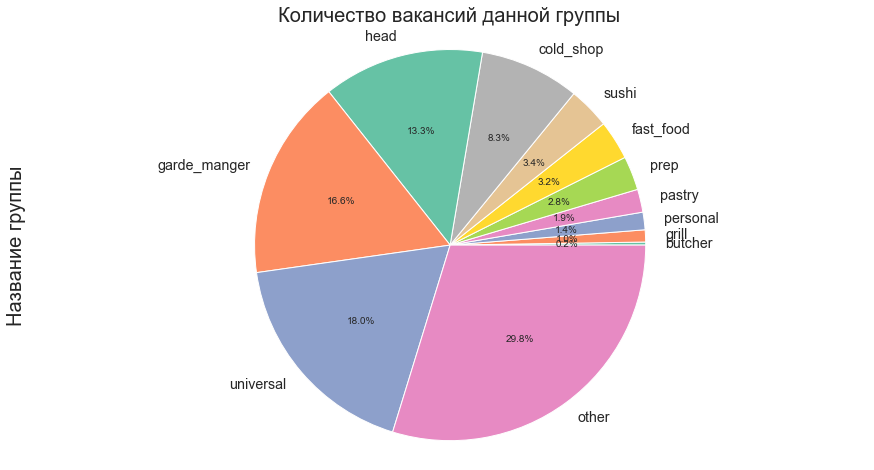

In [157]:
show_groups(pr_df_cook)

Самые популярный повара:
1. Универсал
2. Повар горячего цеха
3. Шеф повар, руководящий

### Средняя и медианная заработная плата.

In [158]:
pr_df_cook['sal_RUR'] = pr_df_cook.apply(sal_func, axis=1)
pr_df_cook['sal_RUR'].describe()

count       939.000000
mean      54670.343237
std       23038.102596
min          50.000000
25%       42500.000000
50%       50250.000000
75%       60250.000000
max      250000.000000
Name: sal_RUR, dtype: float64

Как видим, средняя зарплата - `54670р.`, медианная – `50250р.`.

### Какие ключевые навыки требуются для данной вакансии.

In [160]:
result_cook_skills_dict = dict()
def count_skills(skills_str: str):
    skills_list = skills_str.split(', ')
    for skill in skills_list:
        if result_cook_skills_dict.get(skill) is not None:
            result_cook_skills_dict[skill] += 1
        else: 
            result_cook_skills_dict[skill] = 1
pr_df_cook['key_skills'].apply(count_skills)

0       None
1       None
2       None
3       None
4       None
        ... 
1995    None
1996    None
1997    None
1998    None
1999    None
Name: key_skills, Length: 2000, dtype: object

In [161]:
cook_skills_df = pd.DataFrame.from_dict(result_cook_skills_dict, orient='index')
cook_skills_df.sort_values(inplace=True, by=[0], ascending=False)
cook_skills_df.drop(index='', inplace=True) 

In [162]:
cook_skills_df.head(20)

,0
Работа в команде,898
Общественное питание,505
Умение работать в команде,342
Контроль качества,341
Контроль сроков годности,280
Пользователь ПК,268
Грамотная речь,183
Поварское дело,133
Инвентаризация,124
Обучение персонала,92


Как видим самым востебованным навыком является `Работа в команде` – он есть почти в 50% вакансий, также `контроль качества и сроков годности`.

### Какой опыт требуется для данной вакансии?

In [163]:
exp_groups_cook = pr_df_cook.groupby('experience')['id'].count().sort_values(ascending=False)
exp_groups_cook

experience
От 1 года до 3 лет    1148
Нет опыта              432
От 3 до 6 лет          372
Более 6 лет             48
Name: id, dtype: int64

Как видим наибольшее число вакансий с опытом работы `от 1 до 3 лет`.

### Какие работодатели в топе?

In [164]:
employer_groups_cook = pr_df_cook.groupby('employer_name')['id'].count().sort_values(ascending=False)
employer_groups_cook[employer_groups_cook > 15]

employer_name
БУРГЕР КИНГ РОССИЯ                           30
JCat.ru                                      28
Додо Пицца (Корпоративная розничная сеть)    23
ЭКСПРЕСС                                     21
White Rabbit Family                          21
Maison DELLOS                                18
Теремок, Группа компаний                     18
Тануки, японский ресторан                    18
СИМПЛЕКС                                     16
United Catering Group                        16
Spar                                         16
Name: id, dtype: int64

В топе:
1. БУРГЕР КИНГ
2. JCat.ru
3. Додо Пицца

### В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

См. ниже график распределения спроса на вакансию в Москве. Наибольшим спросом - в центральном АО, наименьшим - Восточно АО, Северо-Восточно АО.

### Гистограмма распределения зарплаты. 

In [165]:
salary_hist(pr_df_cook)

Большая часть распределения сосредоточена около своего среднего и медианы.

### Зависимость количества вакансий от группы и навыка

In [166]:
SKILLS_COOK_TOP15 = list(cook_skills_df.iloc[:15].index)
groups_to_skills_cook = pd.DataFrame(index=SKILLS_COOK_TOP15, columns=COOK_GROUPS.keys(), dtype=np.int64)
groups_to_skills_cook.fillna(value=0, inplace=True)
groups_to_skills_cook.head(2)

,universal,personal,sushi,garde_manger,cold_shop,head,butcher,prep,fast_food,pastry,grill
Работа в команде,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Общественное питание,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
def generate_skills_dict_cook(row):
    skills_list = row['key_skills'].split(', ')
    for skill in skills_list:
        if skill in SKILLS_COOK_TOP15:
                groups_to_skills_cook.loc[skill, row['group']] += 1

In [168]:
def build_pivot_skills_to_groups_cook():
    for cur_group in COOK_GROUPS.keys():
        tmp_df = pr_df_cook[pr_df_cook['group'] == cur_group]
        tmp_df.apply(generate_skills_dict_cook, axis=1)

In [169]:
build_pivot_skills_to_groups_cook()
groups_to_skills_cook.replace(0, np.nan, inplace=True)
groups_to_skills_cook.head(3)

,universal,personal,sushi,garde_manger,cold_shop,head,butcher,prep,fast_food,pastry,grill
Работа в команде,183.0,12.0,36.0,153.0,61.0,132.0,1.0,15.0,44.0,12.0,10.0
Общественное питание,100.0,4.0,30.0,91.0,40.0,40.0,NaN,11.0,15.0,10.0,11.0
Умение работать в команде,81.0,5.0,13.0,55.0,24.0,17.0,NaN,11.0,35.0,4.0,1.0


In [170]:
show_heatmap(groups_to_skills_cook, zmin=15, zmax=70)

На самом деле мало о чем говорит, если не ты шеф, то навыки, которые от тебя требуется не отличаются, просто из-за того что некоторые группы вакансий сильно больше других, поэтому и цвета ярче.

Однако стоит заметить, что от шефа сильно требуют Контроль качества, Обучение персонал и, очевидно, управление персоналом.

### Зависимость средней зарплаты от требуемых навыков

In [171]:
def show_sal_avg_to_skills_cook():
    skill_to_avg_df = pd.DataFrame(index=SKILLS_COOK_TOP15, columns=['average_salary'])
    for skill in SKILLS_COOK_TOP15:
        df_for_skill = pr_df_cook[pr_df_cook['key_skills'].str.contains(skill, regex=False)]
        skill_to_avg_df.loc[skill, 'average_salary'] = df_for_skill['sal_RUR'].mean()
    
    fig = px.scatter(skill_to_avg_df, x=skill_to_avg_df.index, y="average_salary")
    fig.update_layout(
        height=600, width=1000, 
        title_text='Зависимость средней заработной платы от требуемых навыков', 
        title_font_size=16, 
        xaxis_title='Навык в вакансии',
        yaxis_title='Средняя зарплата'
    )
    fig.show()
    return

In [172]:
show_sal_avg_to_skills_cook()

Здесь хорошо видно, что вакансии с навыками Обучение персонала и Управление персоналом имеют более высокую среднюю зарплату, и это не случайно, так как данные скилы требуют от Шеф-Поваров и руководителей.

### Распределение средней зарплаты по Москве

In [173]:
visualize_vacancies_with_sal(pr_df_cook, "Повар", zoom=9, cnt_lat=55.78, cnt_lon=37.63)

### Распределение спроса на вакансию по карте Москвы

In [174]:
visualize_all_vacancies(pr_df_cook, "Повар", zoom=9, cnt_lat=55.78, cnt_lon=37.63)

Явно видно, что в центральном АО намного больше вакансий для повара.

**Замечание в тему.** Многие из вас наверняка сейчас уже начинают задумываться о работе. Конечно, вы имеете на это полное право. Однако, по нашему опыту работа на 3 курсе отрицательно сказывается на степени усвоения материала. По сути все предметы цикла Data Science у вас еще впереди. Подумайте, наверное, лучше разобраться во всем во время учебы, чем потом что-то где-то нагонять. Более простой вариант &mdash; летняя стажировка, но не забудьте отдохнуть, набравшись сил перед непростым 3 курсом ☺.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 4.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

#### Оценка параметра для  равномерного распределения $U(a, b)$
Пусть $X_1, \dots, X_n$ - выборка из распределения.

Для первого и второго моментов запишем систему:
1. $\mathsf{E}X_1 = \overline{X} \Rightarrow a + b = 2\overline{X} \Rightarrow a = 2\overline{X} - b$
2. $\mathsf{E}X_1^2=\overline{X^2} \Rightarrow a^2 + ab + b^2 = 3\overline{X^2}$

Если вычесть из второго квадрат первого то получим дисперсию:
$\mathsf{D}X_1^2=\overline{X^2}-\overline{X}^2 \Rightarrow (b-a)^2 = 12(\overline{X^2} - \overline{X}^2)$ **(3)**

Подставим выражение для $a$  в **(3)**
$(b-\overline{X})^2 = 3(\overline{X^2}-\overline{X}^2) \Rightarrow b = \sqrt{3(\overline{X^2}-\overline{X}^2)} + \overline{X}$. При извлечении корня взяли положительный знак, так как $b \geq a$.

 Тогда выражение для $a = \overline{X} - \sqrt{3(\overline{X^2}-\overline{X}^2)}$

#### Оценка параметра для  пуассоновского распределения $Pois(\theta)$
Пусть $X_1, \dots, X_n$ - выборка из распределения. Так как матожидание Пуассоновского с параметром $\theta$ это $\theta$, то оценка по методу моментов это $\theta = \overline{X}$

#### Оценка параметра для  нормального распределения $\mathcal{N}(a, \sigma^2)$
Пусть $X_1, \dots, X_n$ - выборка из распределения. Запишем систему для моментов сразу вычев из второго уравнения квадрат первого, так во втором уравнении сразу получим равенство для дисперсии.

Запишем систему:
1. $\mathsf{E}X_1 = \overline{X} \Rightarrow a = \overline{X}$
2. $\mathsf{D}X_1 =\overline{X^2} - \overline{X}^2 \Rightarrow \sigma = \sqrt{\overline{X^2} - \overline{X}^2} $

---
### Задача 5.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

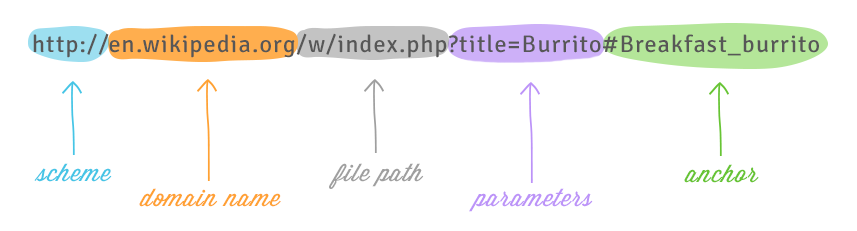

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [ ]:
from url_normalize import url_normalize

In [ ]:
...

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a>. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** При помощи `plotly` визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. При наведении курсора на точку, обозначающую страницу, должна появляться подсказка с названием этой страницы.

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму и ядерную оценку плотности для времени скачивания страницы.

In [ ]:
...

Какими известными вам стандартными распределениями оно может быть приближено? Найдите оценку параметров этого распределения по методу моментов и отобразите на графике плотность с полученными значениями параметров.

*Замечание.* Результат сильно зависит от сайта, железа и прочих характеристик. По идее должно получится неплохое приближение чем-то из того, что вам известно. Но если ничего не получится, то просто оставьте и прокомментируйте ваши попытки разобраться.

In [ ]:
...

**Выводы:** <...>